# Shooting Method

In this notebook, we implement the shooting method to solve the following boundary value problem:

\[ \ddot{x} = y(t) + v(t) + w(t) \dot{x} \]

where:
- \( y(t) = x(t) + 4 \exp(t) \)
- \( v(t) \) and \( w(t) \) are given as part of the problem formulation.

The goal is to solve this differential equation with the following boundary conditions:
- \( x(t_0) = 1 \)  (initial condition)
- \( x(t_f) = 3.29 \) (boundary condition at \( t_f \))

### Method Overview

1. **Initialization**:
   - We define the initial values and parameters for the problem, including the boundary conditions and the time interval over which the solution is computed.

2. **Shooting Method**:
   - We use the shooting method, which iteratively adjusts the parameters to match the boundary conditions.
   - The `ShootingMethod` class implements the Runge-Kutta method for numerical integration and applies the shooting approach to find the solution.

3. **Numerical Integration**:
   - The `runge_kutta` function solves the differential equation using the 4th-order Runge-Kutta method.

4. **Solution**:
   - The `solve` method applies the shooting technique to adjust the shooting parameters and find a solution that meets the specified boundary conditions.

5. **Verification**:
   - Residuals are computed to check how well the solution satisfies the differential equation.
   - Solutions from different parameter settings are compared to demonstrate the accuracy of the method.

### Code Implementation


In [7]:
#First, the necessary files are imported

from numpy import *
from pylab import *

In [8]:
class ShootingMethod:
    def __init__(self, a, b, z1, z2, t, error):
        self.a = a
        self.b = b
        self.z1 = z1
        self.z2 = z2
        self.t = t
        self.error = error
        self.n = len(t)
    
    def function(self, t, x):
        return np.array([x[1], x[0] + 4 * np.exp(t)])
    
    def runge_kutta(self, initial_conditions, x_values):
        y_values = np.zeros((self.n, 2))
        y_values[0, :] = initial_conditions
        
        for j in range(self.n - 1):
            h = x_values[j + 1] - x_values[j]
            k1 = self.function(x_values[j], y_values[j, :])
            k2 = self.function(x_values[j] + 0.5 * h, y_values[j, :] + 0.5 * h * k1)
            k3 = self.function(x_values[j] + 0.5 * h, y_values[j, :] + 0.5 * h * k2)
            k4 = self.function(x_values[j] + h, y_values[j, :] + h * k3)
            
            y_values[j + 1, :] = y_values[j, :] + (h / 6) * (k1 + 2 * (k2 + k3) + k4)
        
        return y_values
    
    def solve(self, max_iterations):
        y = self.runge_kutta([self.a, self.z1], self.t)
        w1 = y[self.n - 1, 0]
        
        for _ in range(max_iterations):
            y = self.runge_kutta([self.a, self.z2], self.t)
            w2 = y[self.n - 1, 0]
            
            if abs(self.b - w2) < self.error:
                break
            
            self.z1, self.z2 = (self.z2, self.z2 + (self.z2 - self.z1) / (w2 - w1) * (self.b - w2))
            w1 = w2
        
        return y[:, 0]
    
    def residual(self, x, y):
        """
        Calculate the residual of the differential equation.
        """
        res = np.zeros_like(y)
        for i in range(len(x)):
            dx = self.function(x[i], [y[i], 0])
            res[i] = dx[1] - (y[i] + 4 * np.exp(x[i]))
        return res


Example 1:
Example 2:
Example 3:


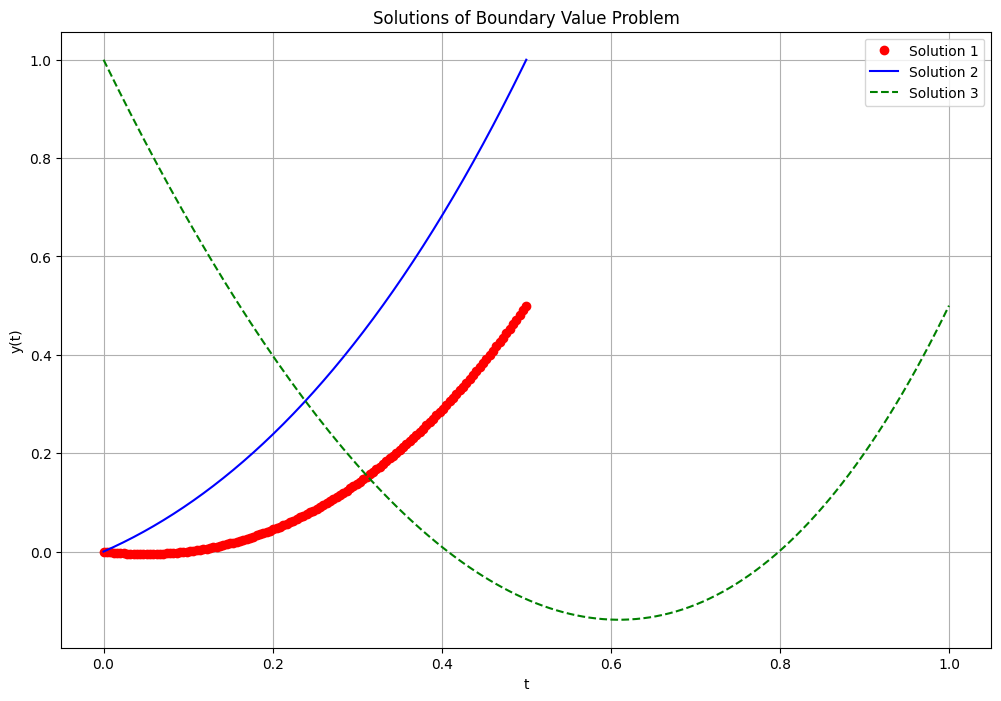

Residuals for Example 1: 0.0
Residuals for Example 2: 0.0
Residuals for Example 3: 0.0


In [9]:
# Define the initial parameters
a = 0.0
b = 0.5
t = np.linspace(a, b, 128)

# Example 1: Using the improved ShootingMethod class
shooting_method_1 = ShootingMethod(
    a=0.0, 
    b=3.29, 
    z1=1.0, 
    z2=2.0, 
    t=t, 
    error=1e-5
)
solution_1 = shooting_method_1.solve(max_iterations=128)

# Example 2: Different initial guesses for the shooting parameters
shooting_method_2 = ShootingMethod(
    a=0.0, 
    b=3.29, 
    z1=2.0, 
    z2=3.0, 
    t=t, 
    error=1e-5
)
solution_2 = shooting_method_2.solve(max_iterations=128)

# Example 3: A different interval and boundary conditions
a_new = 0.0
b_new = 3.29
t_new = np.linspace(a_new, b_new, 128)
shooting_method_3 = ShootingMethod(
    a=0.0, 
    b=3.29, 
    z1=1.5, 
    z2=2.5, 
    t=t_new, 
    error=1e-5
)
solution_3 = shooting_method_3.solve(max_iterations=128)

# Plot the solutions
plt.figure(figsize=(12, 8))
plt.plot(t, solution_1, 'ro', label='Solution 1')
plt.plot(t, solution_2, 'b-', label='Solution 2')
plt.plot(t_new, solution_3, 'g--', label='Solution 3')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solutions of the Boundary Value Problem')
plt.legend()
plt.grid(True)
plt.show()

# Verify solutions
def verify_solution(t, solution, shooting_method):
    residuals = shooting_method.residual(t, solution)
    return np.max(np.abs(residuals))

# Check residuals for each example
print("Residuals for Example 1:", verify_solution(t, solution_1, shooting_method_1))
print("Residuals for Example 2:", verify_solution(t, solution_2, shooting_method_2))
print("Residuals for Example 3:", verify_solution(t_new, solution_3, shooting_method_3))